## Cat vs Dog detector 
#### -Transfer Learning 
-This file will use Transfer Learning (InceptionV3) to train the detection between cat and Dogs pictures.

In [1]:
#import 
import os
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers

In [2]:
# import model and load_weights
from tensorflow.keras.applications.inception_v3 import InceptionV3

link= "inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

pre_trained_model= InceptionV3(
    input_shape=(150,150,3),
    include_top= False,
    weights= None)

pre_trained_model.load_weights(link)

last_layer= pre_trained_model.get_layer("mixed7")
last_output=last_layer.output


In [3]:
print(last_output.shape)

(None, 7, 7, 768)


In [4]:
# model
from tensorflow.keras.optimizers import RMSprop

x= tf.keras.layers.Flatten()(last_output)
x= tf.keras.layers.Dense(1024,activation="relu")(x)
x= tf.keras.layers.Dropout(0.2)(x)
x= tf.keras.layers.Dense(1,activation="sigmoid")(x)

model= Model(pre_trained_model.input,x)
model.compile(loss="binary_crossentropy",
             optimizer=RMSprop(lr=0.0001),
             metrics=["acc"])

In [5]:
import zipfile
link_zip="cats_and_dogs_filtered.zip"
fits= zipfile.ZipFile(link_zip,"r")
fits.extractall("cats_and_dogs_filtered")
fits.close()

In [6]:
base="cats_and_dogs_filtered"
base_train=os.path.join(base,"train")
base_validation= os.path.join(base,"validation")
base_train_cats=os.path.join(base_train,"cats")
base_train_dogs= os.path.join(base_train,"dogs")
base_validation_cats=os.path.join(base_validation,"cats")
base_validation_dogs= os.path.join(base_validation,"dogs")

train_cat_fnames = os.listdir(base_train_dogs)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_jr= ImageDataGenerator(rescale=1/255)

train_dir= train_jr.flow_from_directory(
    base_train,
    target_size=(150,150),
    batch_size=10,
    class_mode="binary")
    
valida_jr= ImageDataGenerator(rescale=1/255)

valida_dir= valida_jr.flow_from_directory(
    base_validation,
    target_size=(150,150),
    batch_size=10,
    class_mode="binary")   

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history= model.fit_generator(
    train_dir,
    steps_per_epoch=8,
    epochs=15,
    validation_data=valida_dir,
    validation_steps=8,
    verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
8/8 - 26s - loss: 0.8652 - acc: 0.6250 - val_loss: 0.5210 - val_acc: 0.7625
Epoch 2/15
8/8 - 23s - loss: 0.7612 - acc: 0.6625 - val_loss: 0.8291 - val_acc: 0.7125
Epoch 3/15
8/8 - 25s - loss: 0.4004 - acc: 0.8250 - val_loss: 0.4258 - val_acc: 0.8625
Epoch 4/15
8/8 - 25s - loss: 0.2297 - acc: 0.9375 - val_loss: 0.4943 - val_acc: 0.8750
Epoch 5/15
8/8 - 29s - loss: 0.2936 - acc: 0.9000 - val_loss: 0.1873 - val_acc: 0.9500
Epoch 6/15
8/8 - 25s - loss: 0.3220 - acc: 0.8375 - val_loss: 0.3704 - val_acc: 0.9000
Epoch 7/15
8/8 - 26s - loss: 0.2933 - acc: 0.8500 - val_loss: 0.2611 - val_acc: 0.9250
Epoch 8/15
8/8 - 25s - loss: 0.2353 - acc: 0.8875 - val_loss: 0.1689 - val_acc: 0.9250
Epoch 9/15
8/8 - 26s - loss: 0.1519 - acc: 0.9125 - val_loss: 0.2692 - val_acc: 0.9625
Epoch 10/15
8/8 - 27s - loss: 0.1149 - acc: 0.9500 - val_loss: 0.0766 - val_acc: 0.9375
Epoch 11/15
8/8 - 27s - loss: 0.6852 - acc: 0.8000 - 

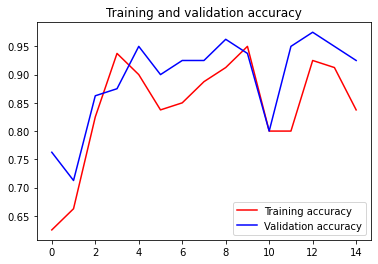

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()